In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd

df = pd.read_csv("drive/MyDrive/sprint_food.csv")

In [ ]:
df

,id,name,image_file_key,food_count
0,609dca7a-d28b-4bd4-8ee7-f7d90bc45345,쌀밥,279c4a9f-d250-4b29-85cd-6996eed0201c,13107
1,609dca7a-d28b-4bd4-8ee7-f7d90bc45345,쌀밥,9cf26657-d3ad-43b9-bb5b-24c1b5fd9972,13107
2,609dca7a-d28b-4bd4-8ee7-f7d90bc45345,쌀밥,febfa5b8-4d7f-4bef-bb4d-f42b9639d155,13107
3,609dca7a-d28b-4bd4-8ee7-f7d90bc45345,쌀밥,2cc2e8c9-c3ff-48aa-8024-c40bf406cf7d,13107
4,609dca7a-d28b-4bd4-8ee7-f7d90bc45345,쌀밥,9272675d-9579-4e6e-8c1c-787fedabe219,13107
...,...,...,...,...
39684,1dc24a94-1b9e-4aa4-8056-18456932c52c,백김치,6e9a2186-c2d6-4146-a615-e57c1a7bf419,501
39685,1dc24a94-1b9e-4aa4-8056-18456932c52c,백김치,c41540e5-eb6e-4fca-b3f5-502c552406c8,501
39686,1dc24a94-1b9e-4aa4-8056-18456932c52c,백김치,7d42f004-87c6-41f1-ad68-7d99962ac410,501
39687,1dc24a94-1b9e-4aa4-8056-18456932c52c,백김치,80eb28ac-3462-48fd-a42e-9717bfadeec0,501


In [18]:
# pandas 라이브러리를 불러옵니다.
import pandas as pd

# 데이터프레임을 'name' 컬럼으로 그룹화합니다.
grouped = df.groupby('name')

# 각 그룹에 대해 새로운 데이터프레임을 생성하고 인덱스를 초기화합니다.
dfs = [group.reset_index(drop=True) for _, group in grouped]


In [19]:
for i in dfs[:3] :
  save_name = i["name"].iloc[0]
  i.to_csv(f"{save_name}.csv")

In [20]:
base_url = "https://static.sprintapp.team/images/"

In [ ]:
import os
import requests
from PIL import Image
from io import BytesIO
# pandas 라이브러리를 불러옵니다.
import pandas as pd

# 데이터프레임을 'name' 컬럼으로 그룹화합니다.
grouped = df.groupby('name')

# 각 그룹에 대해 새로운 데이터프레임을 생성하고 인덱스를 초기화합니다.
dfs = [group.reset_index(drop=True) for _, group in grouped]

'''for i in dfs[:3] :
  save_name = i["name"].iloc[0]
  i.to_csv(f"{save_name}.csv")'''

base_url = "https://static.sprintapp.team/images/"


# 리스트 안에 담긴 각 데이터프레임의 name" 컬럼을 폴더 이름으로 하고 S3 저장소에 요청을 보내 해당 폴더의 이름 아래 저장합니다.
# 저장할 때 인덱스 슬라이싱을 통해 본인이 할당 받은 데이터를 저장할 수 있도록 합시다.
for i in dfs[3:4] :
  folder_name = i["name"].iloc[0]
  os.makedirs("drive/MyDrive/Sprint/"+folder_name)
  for j in i["image_file_key"] :
    response = requests.get(base_url + j)

    # 받은 데이터를 바이트 스트림으로 변환
    img_data = BytesIO(response.content)

    # 바이트 스트림을 이미지 객체로 변환
    img = Image.open(img_data)

    # 이미지 객체를 JPG 파일로 저장
    img.save(os.path.join("drive/MyDrive/Sprint/", f'{folder_name}/',f'{folder_name}_{j}.jpg'))

In [23]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [24]:
!pip install -q \
autodistill \
autodistill-grounded-sam \
autodistill-yolov8 \
roboflow \
supervision==0.9.0

간장양념장.csv  감자튀김.csv  간장.csv  drive/  sample_data/


In [34]:
import supervision as sv
IMAGE_DIR_PATH = "/content/drive/MyDrive/Sprint/감자튀김"
image_paths = sv.list_files_with_extensions(
    directory=IMAGE_DIR_PATH,
    extensions=["png", "jpg", "jpg"])

print('image count:', len(image_paths))

image count: 276


In [35]:
from autodistill.detection import CaptionOntology

ontology=CaptionOntology({
    'french fries' : "They are typically long, thin strips of potato that have been deep-fried until they are crispy and golden brown. The fries have a distinctive elongated shape with a golden, slightly textured surface. They are often seasoned with salt, giving them a savory flavor. French fries are typically served in a pile or in a container and are a common fast food item. They can vary in size, but they are generally uniform in shape and color. French fries are a popular snack or accompaniment to a variety of dishes and are often enjoyed with ketchup or other dipping sauces."
})

In [38]:
from autodistill_grounded_sam import GroundedSAM

food = IMAGE_DIR_PATH.split("/")[-1]
DATASET_DIR_PATH = f"/content/drive/MyDrive/Sprint/{food}_output"

base_model = GroundedSAM(ontology=ontology)
dataset = base_model.label(
    input_folder=IMAGE_DIR_PATH,
    extension=".jpg",
    output_folder=DATASET_DIR_PATH)

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Sprint/감자튀김/감자튀김_faea06b7-c650-480a-96a4-e65f1b4dc939.jpg:   0%|          | 0/138 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:905: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
Labeling /content/drive/MyDrive/Sprint/감자튀김/감자튀김_1e744362-157f-4711-9363-985835c871c1.jpg: 100%|██████████| 138/138 [02:20<00:00,  1.02s/it]


Labeled dataset created - ready for distillation.


In [39]:
HOME = f"/content/drive/MyDrive/Sprint/{food}_output"
ANNOTATIONS_DIRECTORY_PATH = f"{HOME}/train/labels"
IMAGES_DIRECTORY_PATH = f"{HOME}/train/images"
DATA_YAML_PATH = f"{HOME}/data.yaml"


import supervision as sv

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH)

len(dataset)

110

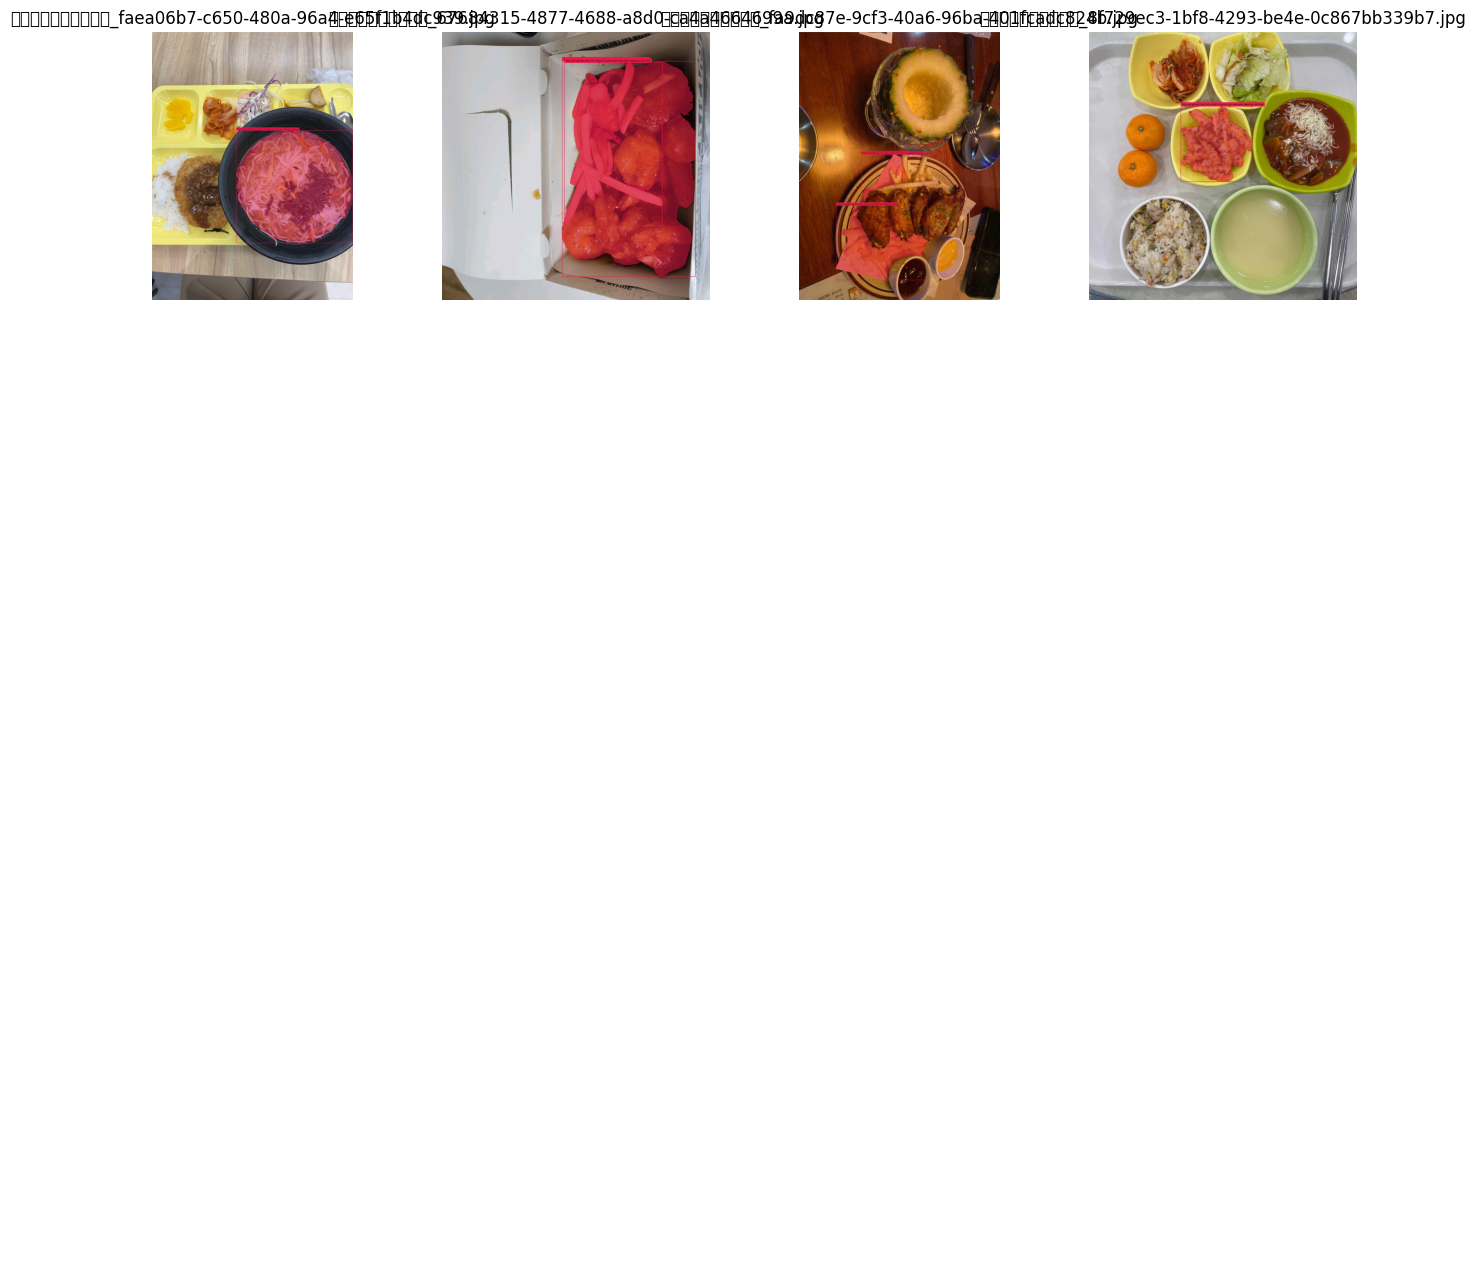

In [52]:
import supervision as sv


# Specify the file path where you want to save the annotations
#file_path = '/content/drive/MyDrive/Sprint/테스트/box_annotations.txt'

# Save the box annotations to a text file


SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 16)
image_names = list(dataset.images.keys())[:16]

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()

images = []
for image_name in image_names[:30]:
    image = dataset.images[image_name]
    annotations = dataset.annotations[image_name]
    labels = [
        dataset.classes[class_id]
        for class_id
        in annotations.class_id]
    annotates_image = mask_annotator.annotate(
        scene=image.copy(),
        detections=annotations)
    annotates_image = box_annotator.annotate(
        scene=annotates_image,
        detections=annotations,
        labels=labels)
    #save_box_annotations_to_txt(annotates_image, file_path)
    images.append(annotates_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE)


In [61]:
#-------- ---------------- 이 아래의 코드는 잊어주세요..



import supervision as sv
import os

image_names = list(dataset.images.keys())[:4]
box_annotator = sv.BoxAnnotator()

for image_name in image_names:
    image = dataset.images[image_name]
    annotations = dataset.annotations[image_name]
    labels = [
        dataset.classes[class_id]
        for class_id
        in annotations.class_id]
    annotates_image = box_annotator.annotate(
        scene=image.copy(),
        detections=annotations,
        labels=labels)

    # Save the box annotations to a text file
    with open(f'{os.path.splitext(image_name)[0]}.txt', 'w') as f:
        for annotation in annotations:
            f.write(f'{annotation.class_id} {annotation.x_center} {annotation.y_center} {annotation.width} {annotation.height}\n')


AttributeError: ignored

In [71]:
for i in annotations :
  print(i)
  break

(array([        888,        1038,        2112,        2223], dtype=float32), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), None, 0, None)


WARNING ⚠️ Ultralytics settings reset to defaults. This is normal and may be due to a recent ultralytics package update, but may have overwritten previous settings. 
View and update settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'


UnicodeEncodeError: ignored

WARNING ⚠️ Ultralytics settings reset to defaults. This is normal and may be due to a recent ultralytics package update, but may have overwritten previous settings. 
View and update settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'


UnicodeEncodeError: ignored

In [ ]:
def save_yolo_annotations_to_txt(image_name, annotations, file_path):
    with open(file_path, 'a') as file:
        for annotation in annotations:
            class_id, x_min, y_min, x_max, y_max = annotation
            # Calculate YOLO format values (normalized coordinates)
            width = x_max - x_min
            height = y_max - y_min
            x_center = x_min + width / 2
            y_center = y_min + height / 2

            line = f'{class_id} {x_center} {y_center} {width} {height}\n'
            file.write(line)

# Assuming each annotation in annotates_image is in the format (class_id, x_min, y_min, x_max, y_max)
# Example: annotations = [(0, 100, 150, 200, 250), ...]

# Path to the directory where you want to save YOLO annotations
annotations_dir = '/content/drive/MyDrive/Sprint/테스트/'

# Create the annotations directory if it doesn't exist
os.makedirs(annotations_dir, exist_ok=True)

for idx, image_name in enumerate(image_names[:30]):
    annotations = []  # Store annotations for the current image
    # Assume annotates_image contains annotations in the format (class_id, x_min, y_min, x_max, y_max)
    for annotation in annotates_image[idx]:
        print(annotation)
        class_id, x_min, y_min, x_max, y_max = annotation
        annotations.append((class_id, x_min, y_min, x_max, y_max))

    # Create a text file for each image to store annotations in YOLO format
    yolo_file_path = os.path.join(annotations_dir, f'{image_name}.txt')
    save_yolo_annotations_to_txt(image_name, annotations, yolo_file_path)

    images.append(annotates_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE)


[ 79  90 134]


ValueError: ignored